<a href="https://colab.research.google.com/github/krishnagorrepati/DeepLearningProjects/blob/master/Frist_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


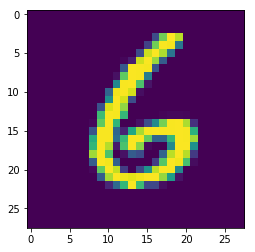

In [205]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
plt.imshow(X_train[6000])


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [208]:
y_train[:10]
#print(X_train[0])

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [210]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [211]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3,3, activation='relu'))
model.add(Convolution2D(32, 3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 3,3, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu'))
model.add(Convolution2D(32, 3,3, activation='relu'))
model.add(Convolution2D(10, 3,3, activation='relu'))
model.add(Convolution2D(10, 1))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

In [212]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_598 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_599 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_600 (Conv2D)          (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_601 (Conv2D)          (None, 9, 9, 8)           2312      
_________________________________________________________________
conv2d_602 (Conv2D)          (None, 7, 7, 16)          1168      
_________________________________________________________________
conv2d_603 (Conv2D)          (None, 5, 5, 16)          2320      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [217]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
  672/60000 [..............................] - ETA: 16s - loss: 0.0142 - acc: 0.9955

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 16s 265us/step - loss: 0.0258 - acc: 0.9920
Epoch 2/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0246 - acc: 0.9925
Epoch 3/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.0211 - acc: 0.9931
Epoch 4/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.0207 - acc: 0.9931
Epoch 5/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.0193 - acc: 0.9936
Epoch 6/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.0197 - acc: 0.9935
Epoch 7/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.0171 - acc: 0.9948
Epoch 8/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.0170 - acc: 0.9945
Epoch 9/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.0157 - acc: 0.9951
Epoch 10/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0171 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [219]:
print(score)

[0.03369493663392859, 0.9903]


In [0]:
y_pred = model.predict(X_test)

In [143]:
print(y_pred[:9])
print(y_test[:9])

[[1.5374303e-07 1.3928887e-06 1.6381421e-06 2.8358528e-07 1.3079002e-10
  6.6738835e-08 9.9626776e-16 9.9999547e-01 3.5831000e-09 9.7518284e-07]
 [2.9773653e-05 9.3759992e-04 9.9900657e-01 5.5693214e-08 3.6368267e-06
  9.4220562e-11 1.2975192e-07 5.0468190e-09 2.2271359e-05 4.6705587e-11]
 [4.7127169e-06 9.9983549e-01 8.3318455e-06 1.8684942e-06 8.7816888e-06
  8.5932370e-06 5.8495202e-06 9.4087576e-05 3.1847529e-05 3.5699799e-07]
 [9.9992776e-01 6.8764822e-10 3.6017380e-07 1.7139246e-08 3.5596266e-11
  6.3534178e-05 6.9849980e-06 6.1024657e-08 2.5219927e-07 1.0260259e-06]
 [1.1718531e-09 4.6119379e-09 3.5406751e-07 1.6486588e-08 9.9921119e-01
  1.8610978e-08 2.3821505e-09 8.8555163e-07 5.0623732e-09 7.8758394e-04]
 [1.7342456e-06 9.9981922e-01 1.5981497e-06 8.4658336e-07 4.9795390e-06
  7.7994146e-06 1.6768010e-06 1.4332322e-04 1.8192193e-05 5.2761624e-07]
 [4.6183957e-10 1.4602107e-05 1.1620573e-05 6.1015322e-09 9.9847752e-01
  2.1121229e-09 5.3047462e-12 2.1701840e-04 2.2431198e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [145]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored